### Importing library

In [1]:
import os
import sys
import pandas as pd
os.environ["PYSPARK_PYTHON"] = "/opt/cloudera/parcels/Anaconda/bin/python"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/opt/cloudera/parcels/SPARK2-2.3.0.cloudera2-1.cdh5.13.3.p0.316101/lib/spark2/"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.6-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")


In [2]:
from pyspark.sql.functions import *
from pyspark.sql.functions import lpad
from pyspark.sql.window import Window

### Checking Spark Setup

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ETL').master("local").getOrCreate()
sc = spark.sparkContext

#### Loading data from HDFS

In [5]:
df = spark.read.load("/user/root/etl_project/part-m-00000", format="csv", sep=",", inferSchema="true", header="false")

In [6]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: integer (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: integer (nullable = true)
 |-- _c26: integer (nullable = true)
 |-- _c27: integer (nu

In [7]:
df.show()

+----+-------+---+------+---+--------+---+---------------+------------------+--------------------+----+----+------+------+----+--------------------+----+----------+----+----+------+------+-------+--------------+------+----+----+----+----+-----+----+----+-------+--------------------+
| _c0|    _c1|_c2|   _c3|_c4|     _c5|_c6|            _c7|               _c8|                 _c9|_c10|_c11|  _c12|  _c13|_c14|                _c15|_c16|      _c17|_c18|_c19|  _c20|  _c21|   _c22|          _c23|  _c24|_c25|_c26|_c27|_c28| _c29|_c30|_c31|   _c32|                _c33|
+----+-------+---+------+---+--------+---+---------------+------------------+--------------------+----+----+------+------+----+--------------------+----+----------+----+----+------+------+-------+--------------+------+----+----+----+----+-----+----+----+-------+--------------------+
|2017|January|  1|Sunday|  0|  Active|  1|            NCR|        NÃƒÂ¦stved|         Farimagsvej|   8|4700|55.233|11.763| DKK|          MasterCard|

### Creating Schema using StructType

In [8]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DoubleType, LongType

In [9]:
fileSchema = StructType([
StructField('year',IntegerType(),True),
StructField('month',StringType(),True),
StructField('day',IntegerType(),True),
StructField('weekday',StringType(),True),
StructField('hour',IntegerType(),True),
StructField('atm_status',StringType(),True),
StructField('atm_number',StringType(),True),
StructField('atm_manufacturer',StringType(),True),
StructField('atm_location',StringType(),True),
StructField('atm_streetname',StringType(),True),
StructField('atm_street_number',IntegerType(),True),
StructField('atm_zipcode',IntegerType(),True),
StructField('atm_lat',DoubleType(),True),
StructField('atm_lon',DoubleType(),True),
StructField('currency',StringType(),True),
StructField('card_type',StringType(),True),
StructField('transaction_amount',IntegerType(),True),
StructField('service',StringType(),True),
StructField('message_code',StringType(),True),
StructField('message_text',StringType(),True),
StructField('weather_lat',DoubleType(),True),
StructField('weather_lon',DoubleType(),True),
StructField('weather_city_id',IntegerType(),True),
StructField('weather_city_name',StringType(),True),
StructField('temp',DoubleType(),True),
StructField('pressure',IntegerType(),True),
StructField('humidity',IntegerType(),True),
StructField('wind_speed',IntegerType(),True),
StructField('wind_deg',IntegerType(),True),
StructField('rain_3h',DoubleType(),True),
StructField('clouds_all',IntegerType(),True),
StructField('weather_id',IntegerType(),True),
StructField('weather_main',StringType(),True),
StructField('weather_description',StringType(),True)])


In [10]:
df2 = spark.read.load("/user/root/etl_project/part-m-00000", format="csv", sep=",", schema = fileSchema, header="false")

In [11]:
df2.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- card_type: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name

#### Count of loaded data

In [12]:
df2.count()

2468572

Count after importing data into  dataframe : 2468572

#### ATM Data

In [13]:
df2.select('atm_number','atm_manufacturer').distinct().show(truncate = False)

+----------+----------------+
|atm_number|atm_manufacturer|
+----------+----------------+
|84        |NCR             |
|2         |NCR             |
|4         |NCR             |
|35        |NCR             |
|47        |NCR             |
|105       |Diebold Nixdorf |
|45        |NCR             |
|25        |Diebold Nixdorf |
|78        |Diebold Nixdorf |
|19        |NCR             |
|97        |NCR             |
|80        |NCR             |
|31        |NCR             |
|27        |NCR             |
|40        |Diebold Nixdorf |
|72        |NCR             |
|81        |NCR             |
|24        |NCR             |
|38        |NCR             |
|59        |Diebold Nixdorf |
+----------+----------------+
only showing top 20 rows



In [14]:
df2.select('atm_number','atm_manufacturer').distinct().count()

113

### Creating Location Dimension Dataframe

In [15]:
loc_dim1 = df2.select('atm_location','atm_streetname','atm_street_number','atm_zipcode','atm_lat','atm_lon').distinct()

In [16]:
loc_dim2 = loc_dim1.select(row_number().over(Window.partitionBy().orderBy('atm_location','atm_streetname','atm_street_number','atm_zipcode','atm_lat','atm_lon')).alias('location_id'), col("*"))

In [17]:
loc_dim2.printSchema()

root
 |-- location_id: integer (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)



In [18]:
loc_dim2.count()

109

Count for the Location Dimension : 109

### Creating Date Dimension Dataframe

In [19]:
date_dim1= df2.select('year','month','day','hour','weekday').distinct()

In [20]:
date_dim2 = date_dim1.select(row_number().over(Window.partitionBy().orderBy('year','month','day','hour','weekday')).alias('date_id'), col("*"))

In [21]:
def month_data(x):
    return datetime.datetime.strptime(x,"%B").month
month_cnv = udf(lambda z: month_data(z), IntegerType())

In [22]:
 import datetime

datetime_object= datetime.datetime.strptime("aPRIL","%B")
month_number = datetime_object.month
print('0',month_number)

('0', 4)


In [23]:
pattern1 = 'yyyy/MM/dd hh:mm:ss aa'
date_dim3 = date_dim2.withColumn('full_date_time', unix_timestamp(concat(col('year'),lit('/'),date_format(col('month'),'E'),lit('/'),col('day'),lit(' '), col('hour'),lit(':00')), pattern1).cast('timestamp'))

In [24]:
date_dim3.printSchema()

root
 |-- date_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- full_date_time: timestamp (nullable = true)



In [25]:
# Convert interger values to String 
date_dim3 = date_dim2
date_dim3 = date_dim3.withColumn('year', col('year').cast(StringType()))
date_dim3 = date_dim3.withColumn('hour', col('hour').cast(StringType()))
date_dim3 = date_dim3.withColumn('day', col('day').cast(StringType()))

In [26]:
date_dim3.select('month').distinct().show()

+---------+
|    month|
+---------+
|     July|
| November|
| February|
|  January|
|    March|
|  October|
|      May|
|   August|
|    April|
|     June|
| December|
|September|
+---------+



In [27]:
# Create new column with month as numerical values
date_dim3 = date_dim3.withColumn('month_int',
       when((col("month") == 'January'), '01')
       .when((col("month") == 'February'), '02')
       .when((col("month") == 'March'), '03')
       .when((col("month") == 'April'), '04')
       .when((col("month") == 'May'), '05')
       .when((col("month") == 'June'), '06')
       .when((col("month") == 'July'), '07')
       .when((col("month") == 'August'), '08')
       .when((col("month") == 'September'), '09')
       .when((col("month") == 'October'), '10')
       .when((col("month") == 'November'), '11')
       .otherwise("12"))

In [28]:
# Appending 0 for single digit
date_dim4 = date_dim3

date_dim4 = (date_dim4.withColumn('month_int', when(length(col('month_int')) == 1, concat(lit('0'), col('month'))).otherwise(col('month_int')))
        .withColumn('date', when(length(col('day')) == 1, concat(lit('0'), col('day'))).otherwise(col('day')))
        .withColumn('hhmm', when(length(col('hour')) == 1, concat(lit('0'), col('hour'))).otherwise(col('hour')))
     )

date_dim4.show()

+-------+----+-----+---+----+--------+---------+----+----+
|date_id|year|month|day|hour| weekday|month_int|date|hhmm|
+-------+----+-----+---+----+--------+---------+----+----+
|      1|2017|April|  1|   0|Saturday|       04|  01|  00|
|      2|2017|April|  1|   1|Saturday|       04|  01|  01|
|      3|2017|April|  1|   2|Saturday|       04|  01|  02|
|      4|2017|April|  1|   3|Saturday|       04|  01|  03|
|      5|2017|April|  1|   4|Saturday|       04|  01|  04|
|      6|2017|April|  1|   5|Saturday|       04|  01|  05|
|      7|2017|April|  1|   6|Saturday|       04|  01|  06|
|      8|2017|April|  1|   7|Saturday|       04|  01|  07|
|      9|2017|April|  1|   8|Saturday|       04|  01|  08|
|     10|2017|April|  1|   9|Saturday|       04|  01|  09|
|     11|2017|April|  1|  10|Saturday|       04|  01|  10|
|     12|2017|April|  1|  11|Saturday|       04|  01|  11|
|     13|2017|April|  1|  12|Saturday|       04|  01|  12|
|     14|2017|April|  1|  13|Saturday|       04|  01|  1

In [29]:
# join multiple columns to create full_date_time
date_dim4 = date_dim4.withColumn('full_date_time', 
                    concat(col('year'),lit('-'), col('month_int')))
date_dim4 = date_dim4.withColumn('full_date_time', 
                    concat(col('full_date_time'),lit('-'), col('date')))
date_dim4 = date_dim4.withColumn('full_date_time', 
                    concat(col('full_date_time'),lit(' '), col('hhmm')))
date_dim4 = date_dim4.withColumn('full_date_time', 
                   concat(col('full_date_time'),lit(':00:00')))

In [30]:
date_dim4.show()

+-------+----+-----+---+----+--------+---------+----+----+-------------------+
|date_id|year|month|day|hour| weekday|month_int|date|hhmm|     full_date_time|
+-------+----+-----+---+----+--------+---------+----+----+-------------------+
|      1|2017|April|  1|   0|Saturday|       04|  01|  00|2017-04-01 00:00:00|
|      2|2017|April|  1|   1|Saturday|       04|  01|  01|2017-04-01 01:00:00|
|      3|2017|April|  1|   2|Saturday|       04|  01|  02|2017-04-01 02:00:00|
|      4|2017|April|  1|   3|Saturday|       04|  01|  03|2017-04-01 03:00:00|
|      5|2017|April|  1|   4|Saturday|       04|  01|  04|2017-04-01 04:00:00|
|      6|2017|April|  1|   5|Saturday|       04|  01|  05|2017-04-01 05:00:00|
|      7|2017|April|  1|   6|Saturday|       04|  01|  06|2017-04-01 06:00:00|
|      8|2017|April|  1|   7|Saturday|       04|  01|  07|2017-04-01 07:00:00|
|      9|2017|April|  1|   8|Saturday|       04|  01|  08|2017-04-01 08:00:00|
|     10|2017|April|  1|   9|Saturday|       04|  01

In [31]:
date_dim4 = date_dim4.select('date_id','full_date_time')
date_dim2 = date_dim2.join(date_dim4,on=['date_id'],how = 'left')

In [32]:
date_dim2.show()

+-------+----+-----+---+----+--------+-------------------+
|date_id|year|month|day|hour| weekday|     full_date_time|
+-------+----+-----+---+----+--------+-------------------+
|      1|2017|April|  1|   0|Saturday|2017-04-01 00:00:00|
|      2|2017|April|  1|   1|Saturday|2017-04-01 01:00:00|
|      3|2017|April|  1|   2|Saturday|2017-04-01 02:00:00|
|      4|2017|April|  1|   3|Saturday|2017-04-01 03:00:00|
|      5|2017|April|  1|   4|Saturday|2017-04-01 04:00:00|
|      6|2017|April|  1|   5|Saturday|2017-04-01 05:00:00|
|      7|2017|April|  1|   6|Saturday|2017-04-01 06:00:00|
|      8|2017|April|  1|   7|Saturday|2017-04-01 07:00:00|
|      9|2017|April|  1|   8|Saturday|2017-04-01 08:00:00|
|     10|2017|April|  1|   9|Saturday|2017-04-01 09:00:00|
|     11|2017|April|  1|  10|Saturday|2017-04-01 10:00:00|
|     12|2017|April|  1|  11|Saturday|2017-04-01 11:00:00|
|     13|2017|April|  1|  12|Saturday|2017-04-01 12:00:00|
|     14|2017|April|  1|  13|Saturday|2017-04-01 13:00:0

In [33]:
date_dim2.printSchema()

root
 |-- date_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- full_date_time: string (nullable = true)



In [34]:
# Rearranging fields
date_dim2 = date_dim2.select('date_id','full_date_time','year','month','day','hour','weekday')

In [35]:
date_dim2.printSchema()

root
 |-- date_id: integer (nullable = true)
 |-- full_date_time: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- weekday: string (nullable = true)



In [36]:
date_dim2.count()

8685

### Count for the Date Dimension : 8685

### Creating Card Type Dimension Dataframe

In [37]:
card_dim1 = df2.select('card_type').distinct()

In [38]:
card_dim2 = card_dim1.select(row_number().over(Window.partitionBy().orderBy('card_type')).alias('card_type_id'), col("*"))

In [39]:
card_dim2.printSchema()

root
 |-- card_type_id: integer (nullable = true)
 |-- card_type: string (nullable = true)



In [40]:
card_dim2.count()

12

### Count for the Card Type Dimension : 12

### Creating Atm Dimension Dataframe

In [41]:

atm_dim1 = df2.select('atm_number','atm_manufacturer','atm_lat','atm_lon').distinct()

In [42]:
atm_dim2 = atm_dim1.join(loc_dim2,on =['atm_lat','atm_lon'], how ='left'  )

In [43]:
atm_dim2.show(2)

+-------+-------+----------+----------------+-----------+------------+-------------------+-----------------+-----------+
|atm_lat|atm_lon|atm_number|atm_manufacturer|location_id|atm_location|     atm_streetname|atm_street_number|atm_zipcode|
+-------+-------+----------+----------------+-----------+------------+-------------------+-----------------+-----------+
| 57.005|  9.881|       109| Diebold Nixdorf|          5| Aalborg Syd|           Hobrovej|              440|       9200|
| 56.139|  9.154|         3|             NCR|         48|       Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|               12|       7430|
+-------+-------+----------+----------------+-----------+------------+-------------------+-----------------+-----------+
only showing top 2 rows



In [44]:
atm_dim2.printSchema()

root
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)



In [45]:
atm_dim3 = atm_dim2.select(row_number().over(Window.partitionBy().orderBy('atm_number','atm_manufacturer','atm_lat','atm_lon')).alias('atm_id'), col("atm_number"),col('atm_manufacturer'),col('location_id'))

In [46]:
atm_dim3.printSchema()

root
 |-- atm_id: integer (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- location_id: integer (nullable = true)



In [47]:
atm_dim3.count()

156

### Count for the ATM Dimension : 156

### ATM Fact Dataframe

Joining Card Dimension table

In [48]:
df_final_card = df2.join(card_dim2,on = ['card_type'] ,how ='left')

In [49]:
df_final_card.printSchema()

root
 |-- card_type: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name

In [50]:
df_final_card.count()

2468572

Joining card Dimension table

In [51]:
df_final_card = df2.join(card_dim2,on = ['card_type'] ,how ='left')

In [52]:
df_final_card.count()

2468572

Joining location Dimension table

In [53]:
df_final_loc = df_final_card.join(loc_dim2,on = ['atm_location','atm_streetname','atm_street_number','atm_zipcode','atm_lat','atm_lon'] ,how ='left')

In [54]:
df_final_loc.count()

2468572

In [55]:
df_final_loc.printSchema()

root
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- card_type: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name

Joining date Dimension table

In [56]:
df_final_date = df_final_loc.join(date_dim2,on = ['year','month','day','hour','weekday'] ,how ='left')

In [57]:
df_final_date.count()

2468572

In [58]:
df_final_date.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- card_type: string (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name

Joining Atm dimension table

In [59]:
df_final_atm = df_final_date.join(atm_dim3, on =['atm_number','atm_manufacturer','location_id'] ,how ='left')

In [60]:
df_final_atm.count()

2468572

### Creating Final Fact table 

In [61]:
df_final = df_final_atm.select( 
'atm_id',
'location_id',
'date_id', 
'card_type_id',
'atm_status',			
'currency',		
'service',			
'transaction_amount',	
'message_code',		
'message_text',		
'rain_3h',				
'clouds_all',			
'weather_id',			
'weather_main',		
'weather_description')

In [62]:
## Adding primary key trans_id

df_final1 = df_final.select(row_number().over(Window.partitionBy().orderBy('atm_id',
'location_id',
'date_id', 
'card_type_id',
'atm_status',			
'currency',		
'service',			
'transaction_amount',	
'message_code',		
'message_text',		
'rain_3h',				
'clouds_all',			
'weather_id',			
'weather_main',		
'weather_description')).alias('trans_id'), col("*"))

In [64]:
df_final_date.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- card_type: string (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_number: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name

In [63]:
df_final1.count()

2468572

### Count of Records in each stage - 2468572

### Loading the data back to S3

In [67]:
loc_dim2.write.csv("DIM_LOCATION.csv") 

In [68]:
card_dim2.write.csv("DIM_CARD_TYPE.csv") 

In [69]:
atm_dim3.write.csv("DIM_ATM.csv") 

In [70]:
date_dim2.write.csv("DIM_DATE.csv")

In [71]:
df_final1.write.csv("FACT_ATM_TRANS.csv")

Moved the data to HDFS(/user/root) and then to S3


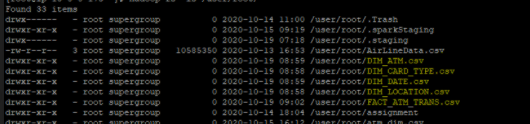

